# Project for DSP2
#### Olzhas Uikas

## Task 1 - Classification with prepared dataset

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer, r2_score, roc_curve, auc


from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv('task1.csv', sep=';', decimal=",")
df.head()

C1      C2  C3      N1       N2       N3      N4     N5  \
0  3139363536333839  323531  33   83.74  3172.92   181.48   24.83   9.60   
1  3437333830323633  343835  31    1.46  1273.88    92.11  211.78  28.98   
2  3134323931353339  323531  33    0.00    31.95   763.19   48.13  77.22   
3  3431333831343031  343433  31  117.49   529.19  1506.40  127.67  49.30   
4  3233343933313234  343835  31    0.00    38.24  3493.18  389.98  72.78   

      N6     N7  ...  N15  N16  N17  N18  N19  N20  N21  N22  N23  TARGET  
0   0.00   0.00  ...    7    0    0   36    7   36    7    0    0       0  
1   5.75  13.85  ...   18    5    6   52   12   57   18    0    0       0  
2   9.33   4.90  ...   24   18    6   46   18   64   24    0    0       0  
3   6.25   0.20  ...   57    4    1  142   56  148   57    0    0       0  
4  16.72   4.28  ...   28   17    5   69   23   86   28    0    0       0  

[5 rows x 27 columns]

In [3]:
df.shape

(514009, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514009 entries, 0 to 514008
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      514009 non-null  int64  
 1   C2      514009 non-null  int64  
 2   C3      514009 non-null  int64  
 3   N1      514009 non-null  float64
 4   N2      514009 non-null  float64
 5   N3      514009 non-null  float64
 6   N4      514009 non-null  float64
 7   N5      514009 non-null  float64
 8   N6      514009 non-null  float64
 9   N7      514009 non-null  float64
 10  N8      514009 non-null  float64
 11  N9      514009 non-null  float64
 12  N10     514009 non-null  float64
 13  N11     514009 non-null  float64
 14  N12     514009 non-null  float64
 15  N13     514009 non-null  float64
 16  N14     514009 non-null  int64  
 17  N15     514009 non-null  int64  
 18  N16     514009 non-null  int64  
 19  N17     514009 non-null  int64  
 20  N18     514009 non-null  int64  
 21  N19     51

#### Columns

In [5]:
print(f"Categorical:", df.columns[:3].to_list())
print(f"Numerical:", df.columns[3:26].to_list())
print(f"Target:", df.columns[26])

Categorical: ['C1', 'C2', 'C3']
Numerical: ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23']
Target: TARGET


#### Null values

In [6]:
df[df.columns].isnull().sum()

C1        0
C2        0
C3        0
N1        0
N2        0
N3        0
N4        0
N5        0
N6        0
N7        0
N8        0
N9        0
N10       0
N11       0
N12       0
N13       0
N14       0
N15       0
N16       0
N17       0
N18       0
N19       0
N20       0
N21       0
N22       0
N23       0
TARGET    0
dtype: int64

So we have clean datset with no null variables

#### Target values

In [7]:
df.TARGET.unique()

array([0, 1], dtype=int64)

In [8]:
df.TARGET.value_counts()

0    488665
1     25344
Name: TARGET, dtype: int64

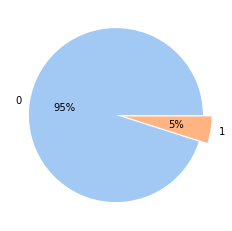

In [9]:
target_pie_values = df.TARGET.value_counts()
plt.pie([target_pie_values[0], target_pie_values[1]], 
        labels=[0, 1], 
        colors=sns.color_palette('pastel'),
        explode=[0, 0.1], autopct='%.0f%%')
plt.show()

**Comment:** Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations.

#### Visualization of the correlation matrix

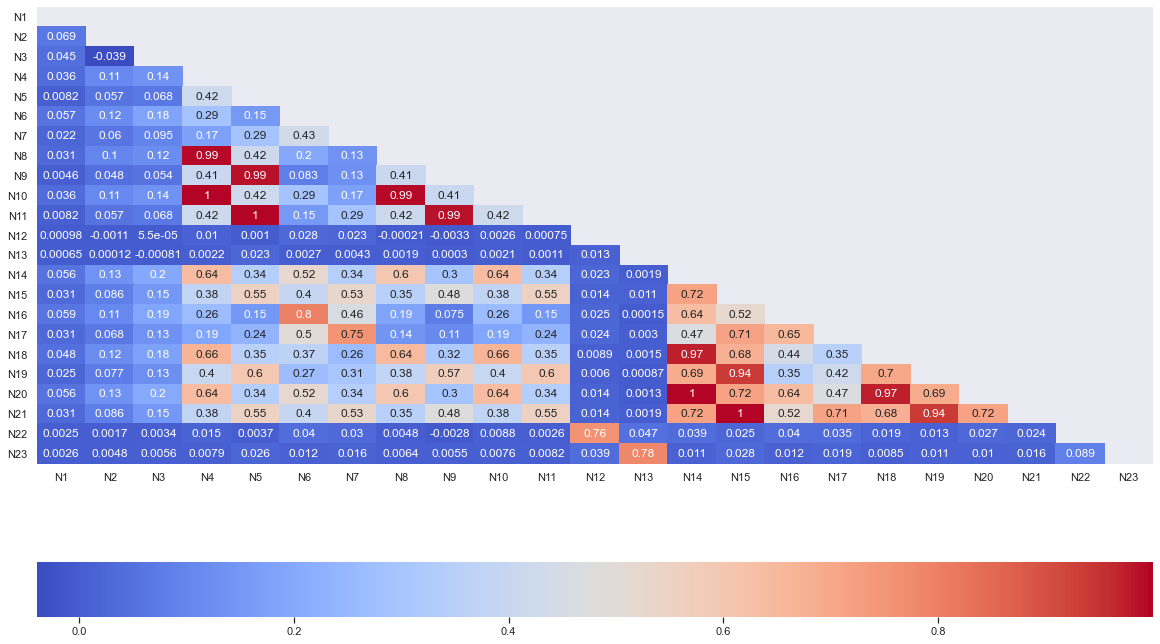

In [10]:
sns.set(rc = {'figure.figsize':(20, 12)})
matrix = np.triu(df.iloc[:, 3:26].corr())
sns.heatmap(df.iloc[:, 3:26].corr(), annot = True, fmt = '.2g', cmap = 'coolwarm',
            cbar_kws= {'orientation': 'horizontal'}, mask=matrix)
plt.show()

**Comment:** A correlation coefficient of 1 indicates a perfect positive correlation. 

In [11]:
df[['N4', 'N10', 'N11', 'N5', 'N20', 'N14', 'N21', 'N15']]

N4     N10    N11     N5  N20  N14  N21  N15
0        24.83   24.83   9.60   9.60   36   36    7    7
1       211.78  211.78  28.98  28.98   57   57   18   18
2        48.13   48.13  77.22  77.22   64   64   24   24
3       127.67  127.67  49.30  49.30  148  148   57   57
4       389.98  389.98  72.78  72.78   86   86   28   28
...        ...     ...    ...    ...  ...  ...  ...  ...
514004    0.00    0.00   0.00   0.00    0    0    0    0
514005    0.00    0.00   0.12   0.12    0    0    1    1
514006    0.00    0.00   1.27   1.27    0    0    1    1
514007    0.00    0.00   0.00   0.00    0    0    0    0
514008    0.00    0.00   0.00   0.00    0    0    0    0

[514009 rows x 8 columns]

In [12]:
print(round(df[df.N4 == df.N10].shape[0]/df.shape[0], 2), '%')
print(round(df[df.N5 == df.N11].shape[0]/df.shape[0], 2), '%')
print(round(df[df.N14 == df.N20].shape[0]/df.shape[0], 2), '%')
print(round(df[df.N15 == df.N21].shape[0]/df.shape[0], 2), '%')

0.99 %
0.99 %
0.99 %
0.99 %


**Comment:** [N10 and N4], [N11 and N5], [N20 and N14], [N21 and N15] not only have a perfect correlation, but they are also almost identical and have 99% of the same data.

In [13]:
print(f"Total number of rows: {df.shape[0]}")
print(f"N10 == N4 : {df[df.N10 == df.N4].shape[0]}")
print(f"N10 != N4 : {df[df.N10 != df.N4].shape[0]}")
print(f"Checking: {(df[df.N10 == df.N4].shape[0] + df[df.N10 != df.N4].shape[0]) == df.shape[0]}" )

print('--'*15)

print(f"Total number of rows: {df.shape[0]}")
print(f"N11 == N5 : {df[df.N11 == df.N5].shape[0]}")
print(f"N11 != N5 : {df[df.N11 != df.N5].shape[0]}")
print(f"Checking: {(df[df.N11 == df.N5].shape[0] + df[df.N11 != df.N5].shape[0]) == df.shape[0]}" )

print('--'*15)

print(f"Total number of rows: {df.shape[0]}")
print(f"N20 == N14 : {df[df.N20 == df.N14].shape[0]}")
print(f"N20 != N14 : {df[df.N20 != df.N14].shape[0]}")
print(f"Checking: {(df[df.N20 == df.N14].shape[0] + df[df.N20 != df.N14].shape[0]) == df.shape[0]}" )

Total number of rows: 514009
N10 == N4 : 508142
N10 != N4 : 5867
Checking: True
------------------------------
Total number of rows: 514009
N11 == N5 : 507535
N11 != N5 : 6474
Checking: True
------------------------------
Total number of rows: 514009
N20 == N14 : 508142
N20 != N14 : 5867
Checking: True


#### Categorical variables

In [14]:
for col in df.columns[:3]:
    print(f'{col} ({df[col].nunique()} unique variables): {df[col].unique()}')

C1 (514009 unique variables): [3139363536333839 3437333830323633 3134323931353339 ... 3535343831313531
 3439393930353235 3334313139353932]
C2 (64 unique variables): [323531 343835 343433 313435 343439   3434 333538 343637   3234 323137
 343834 313931 343139 313438 343038 313339 313430 343138 343836 343039
 323233 343530 313436 343838 313434 343230   3230 343638 343438 333837
 343636 343232 343037   3438 343130   3138 313738 353032 333539 313739
 343030 333631 313736 313437 333537 353036 313137 313333 333633   3631
 313737 313335 313439 313337   3437 313331 343634 313138 323530 343031
   3330 313433 353031 343336]
C3 (3 unique variables): [33 31 32]


**Comment:** 'C1' column has 514009 unique variables that equal to the number of rows in the data set, which means that the 'C1' column can be the id column of our abonents

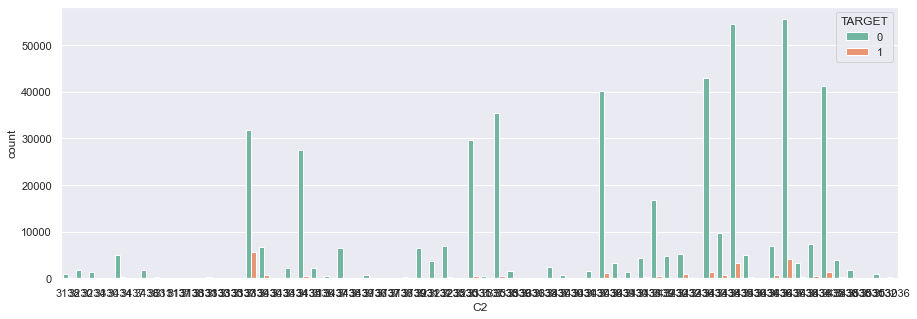

In [15]:
plt.subplots(figsize = (15, 5))
sns.countplot(data = df,  x = 'C2', hue = 'TARGET', palette = 'Set2')
plt.show()

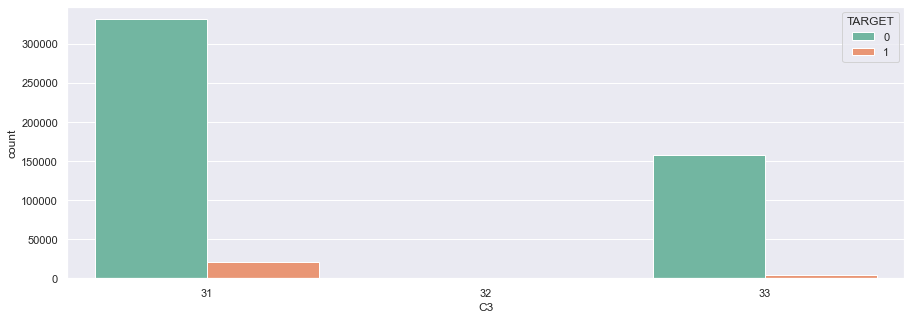

In [16]:
plt.subplots(figsize = (15, 5))
sns.countplot(data = df,  x = 'C3', hue = 'TARGET', palette = 'Set2')
plt.show()

**Comment** Due to an imbalanced dataset, we create a sample of the dataset that will represent the entire population to show the correlation between the categorical variables and the target variable.

In [17]:
yes = df[df['TARGET'] == 1].sample(n = 10000, random_state = 42)
no = df[df['TARGET'] == 0].sample(n = 10000, random_state = 42)
sample = pd.concat([yes, no])

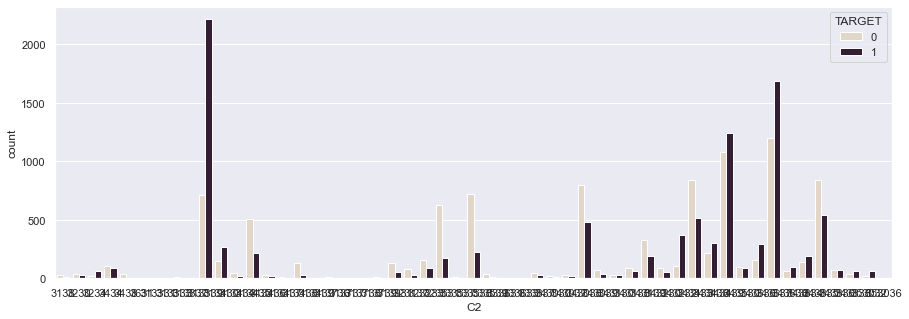

In [18]:
plt.subplots(figsize = (15, 5))
sns.countplot(data = sample,  x = 'C2', hue = 'TARGET', palette = 'ch:.25')
plt.show()

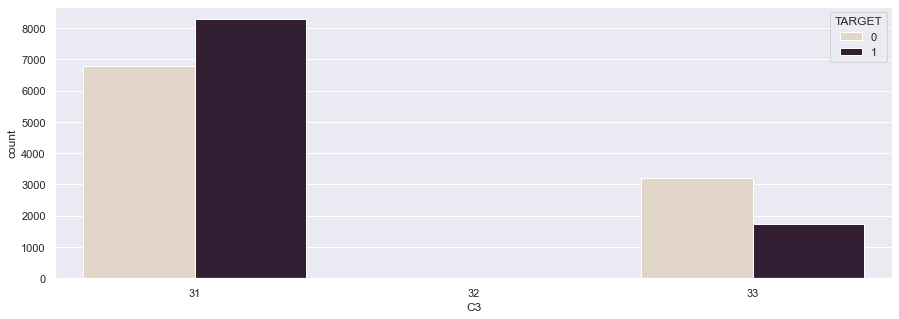

In [19]:
plt.subplots(figsize = (15, 5))
sns.countplot(data = sample,  x = 'C3', hue = 'TARGET', palette = 'ch:.25')
plt.show()

#### Numerical variables

In [115]:
def explore_feature(df, feature):
    plt.figure(figsize = (16, 5))
    sns.scatterplot(data = df, x = df.index, y = feature, hue = 'TARGET')
    plt.title(f'{feature} vs TARGET')
    plt.show()

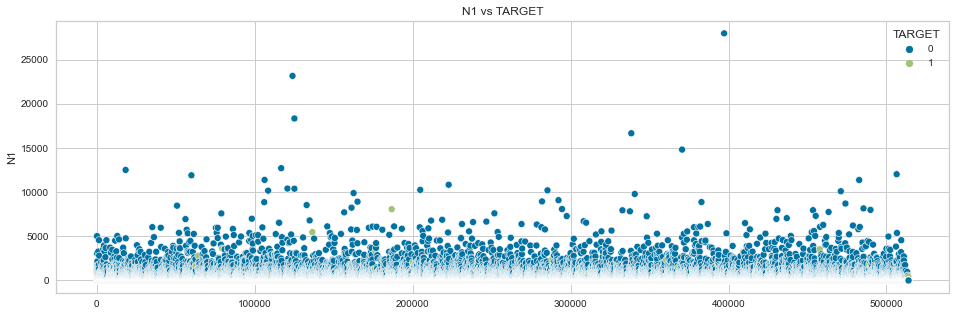

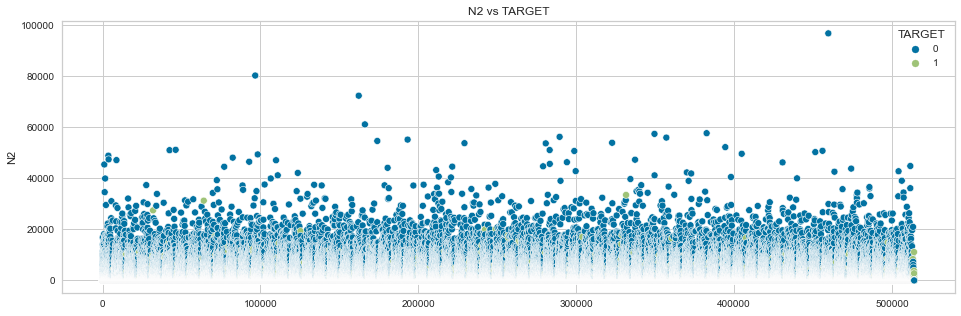

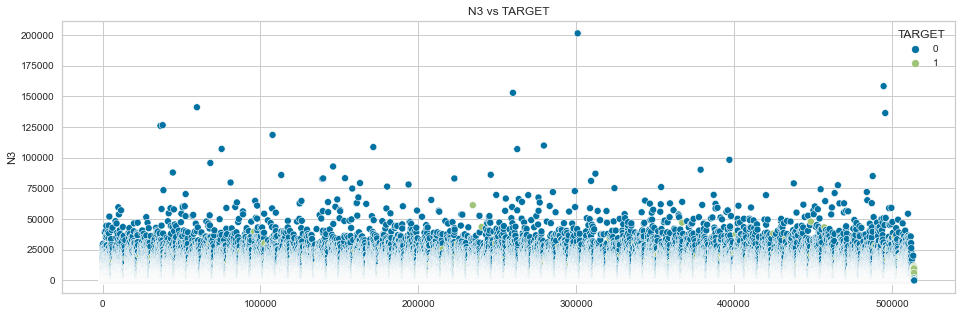

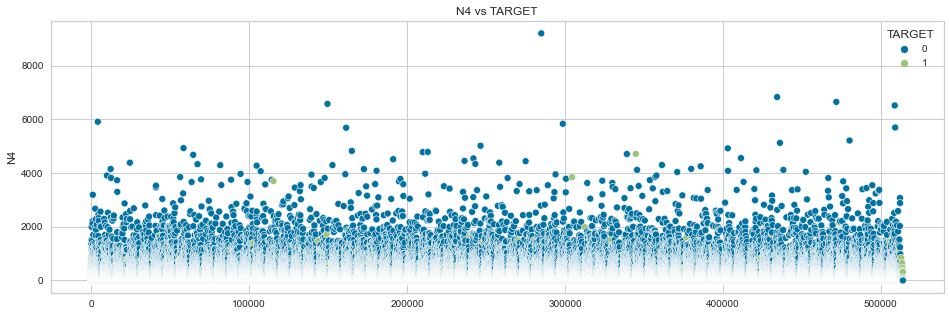

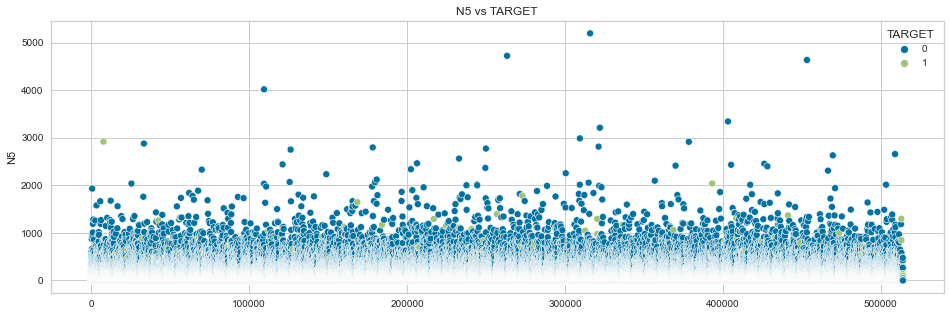

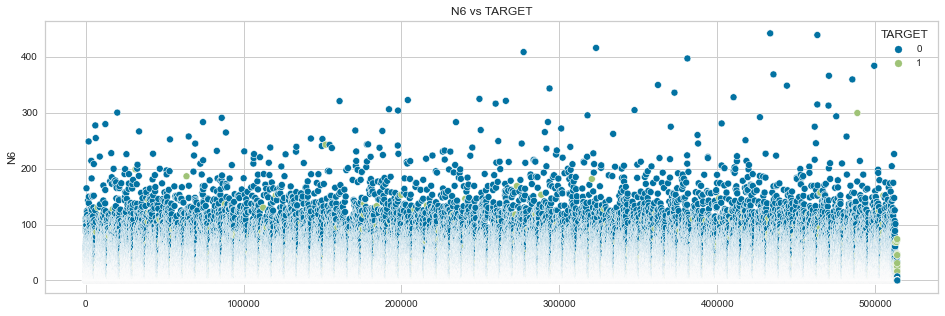

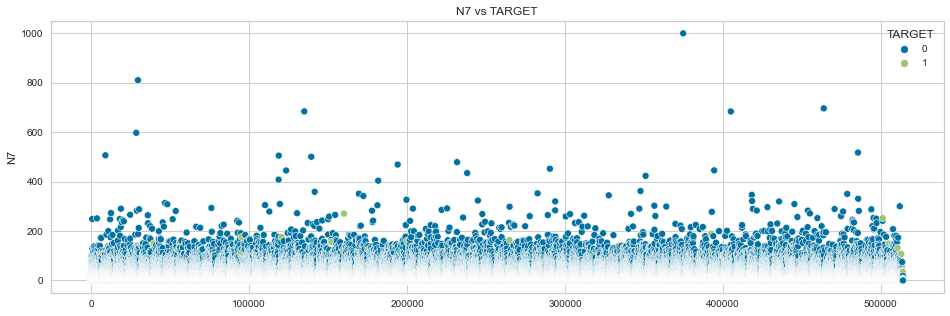

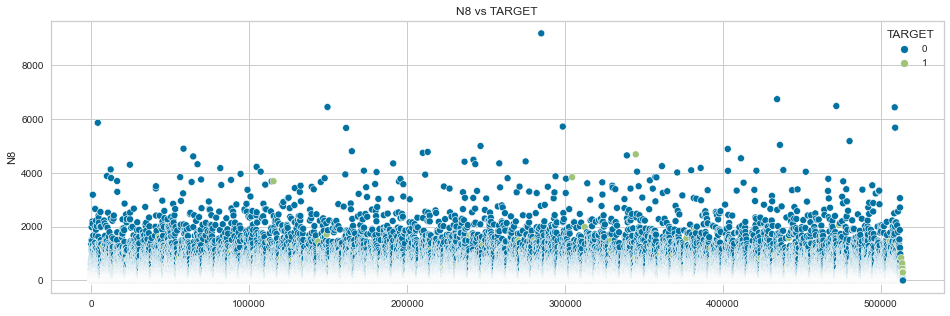

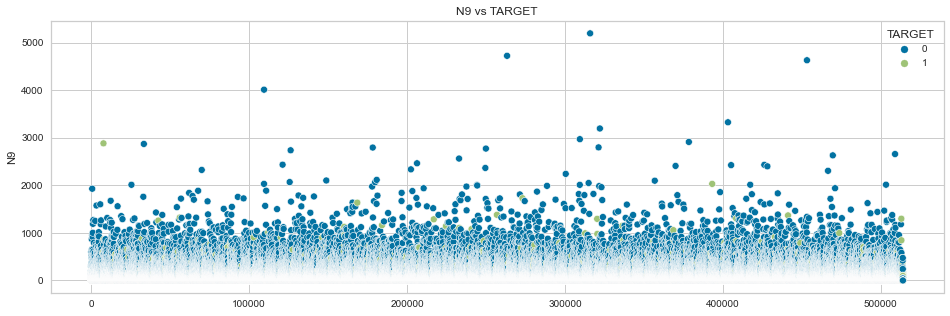

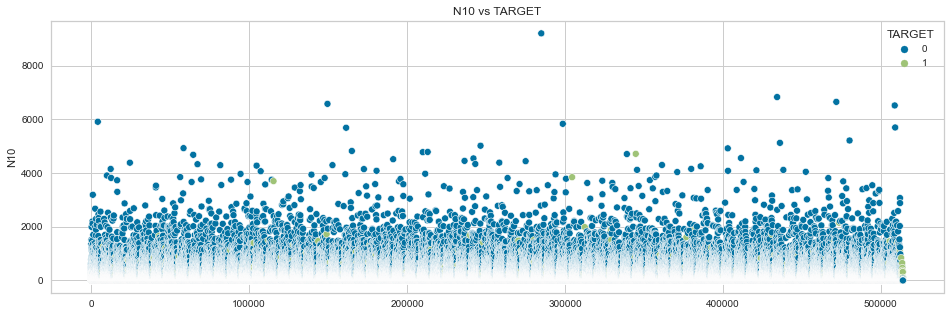

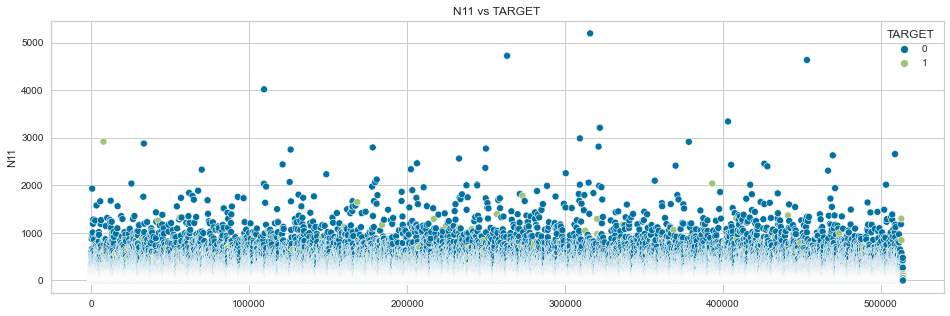

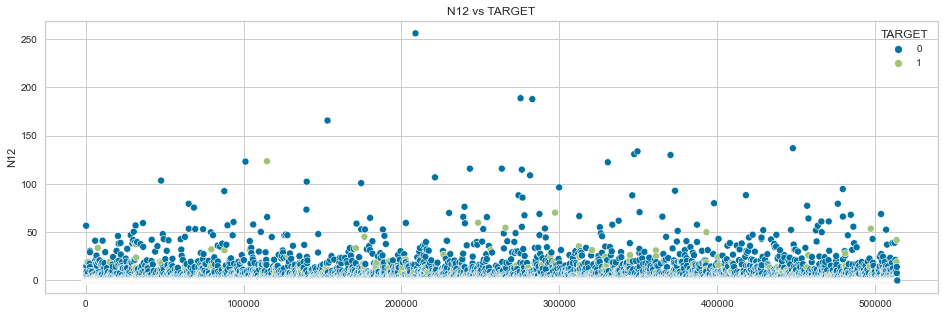

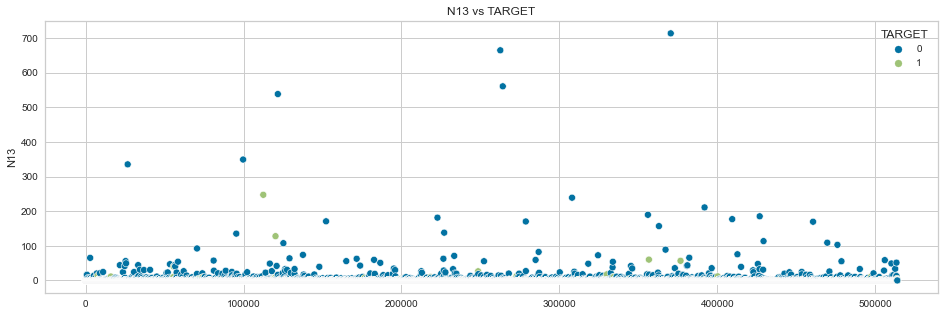

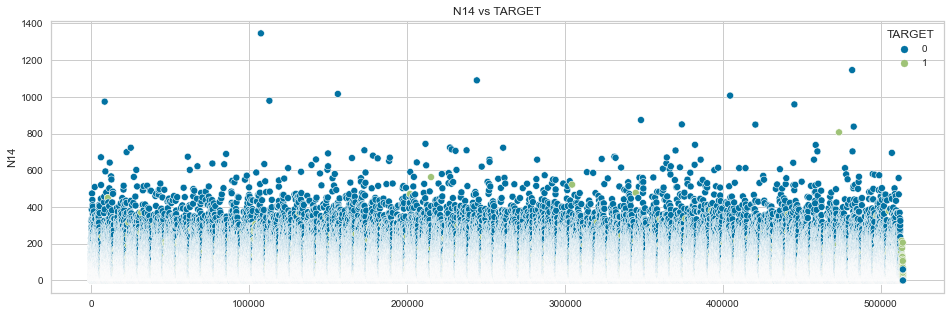

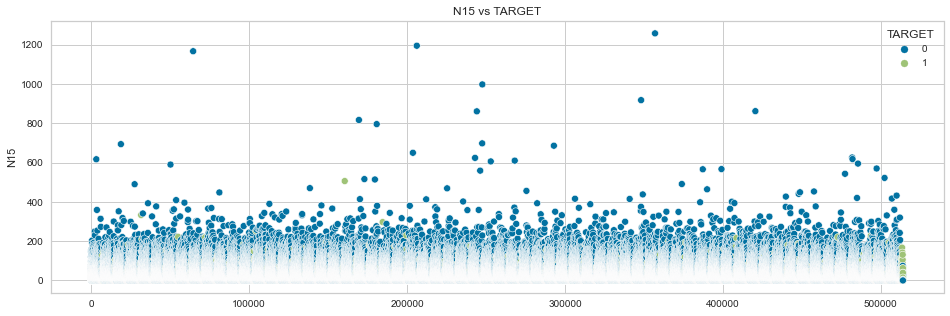

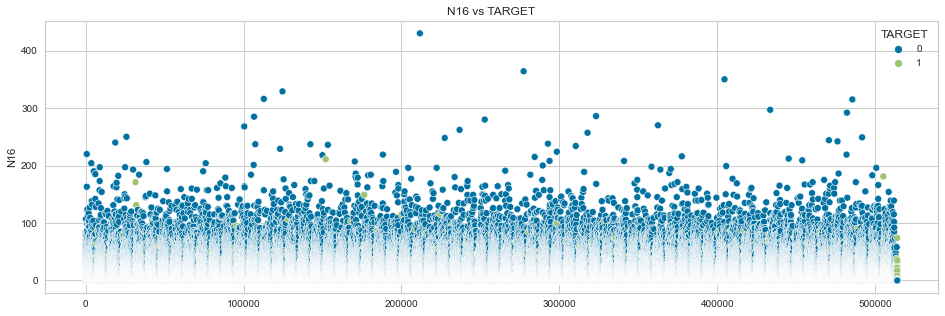

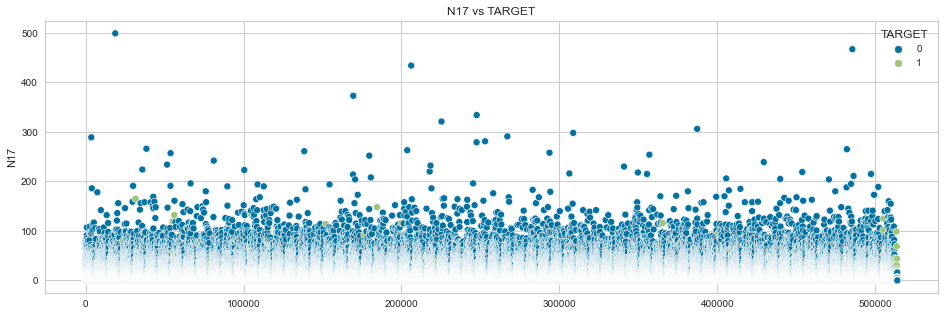

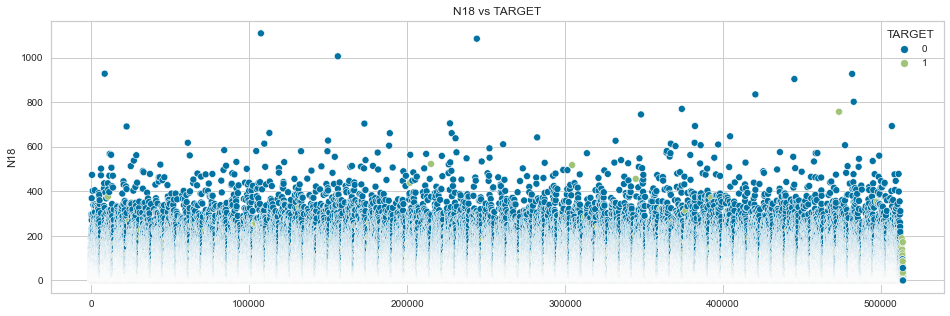

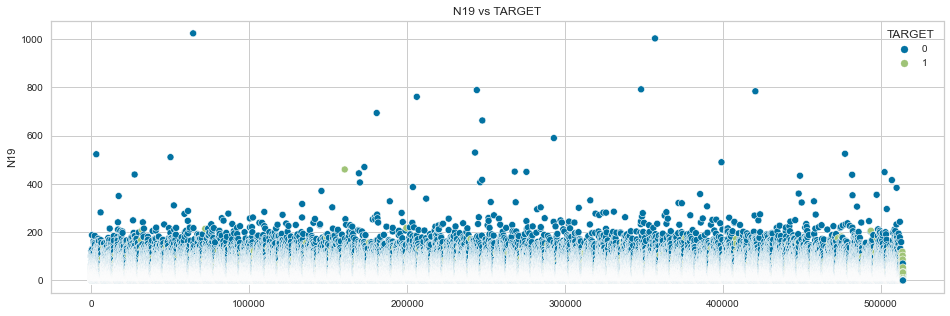

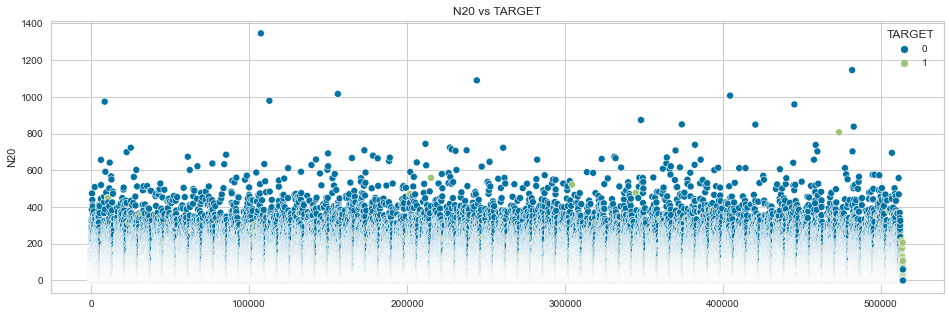

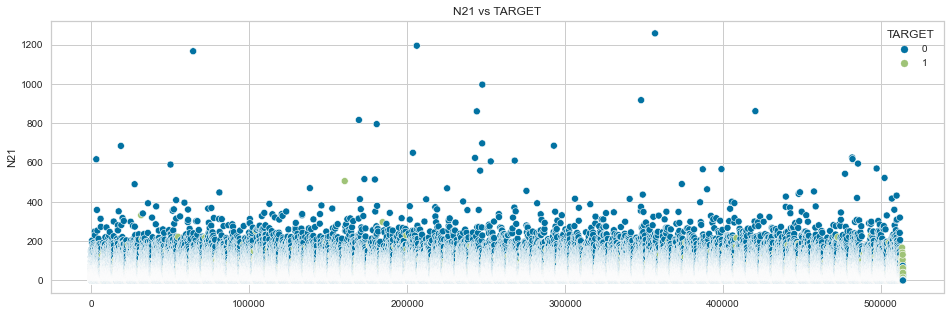

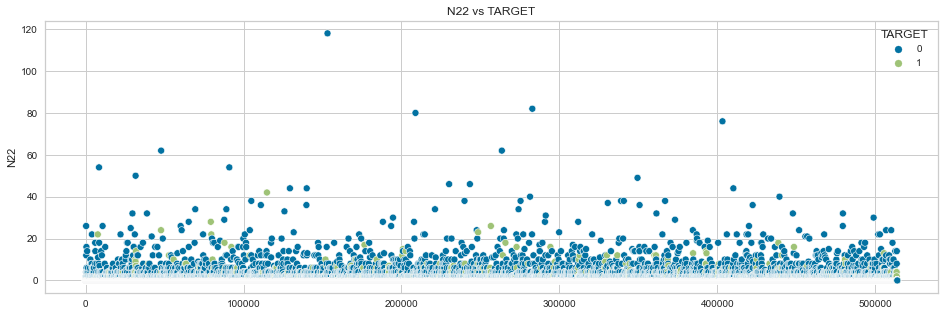

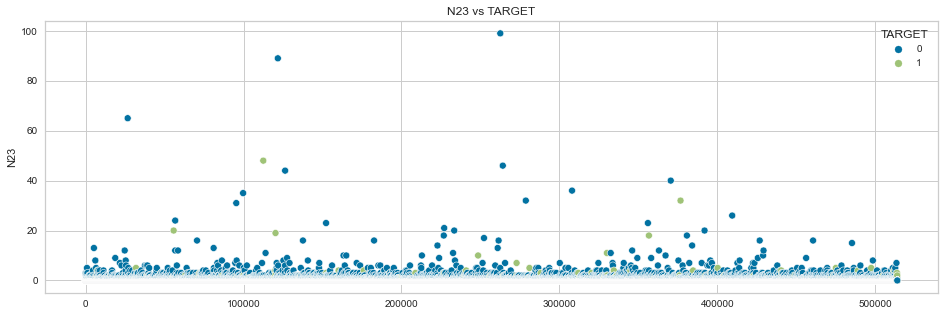

In [116]:
for i in df.columns[3:26]:
    explore_feature(df, i)
    print('\n')

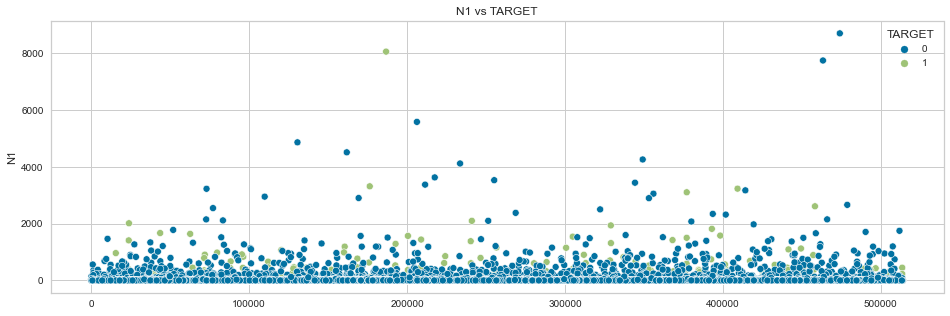

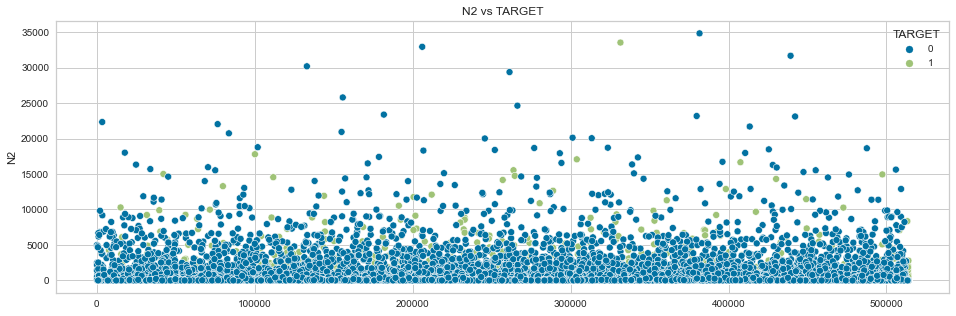

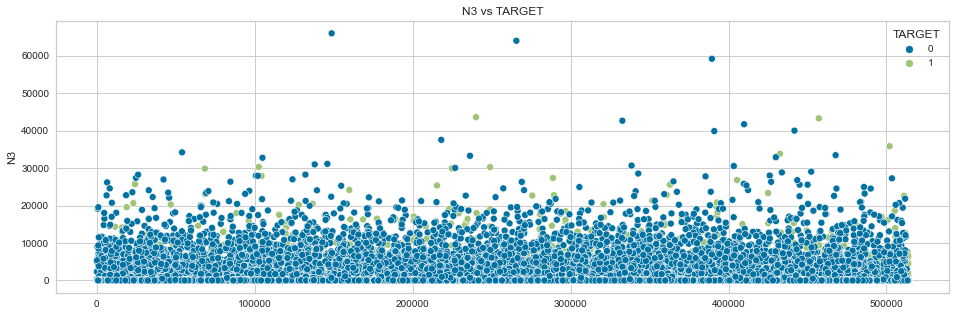

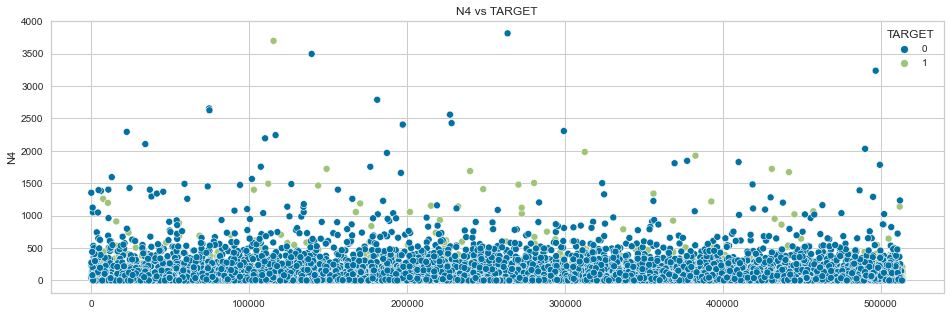

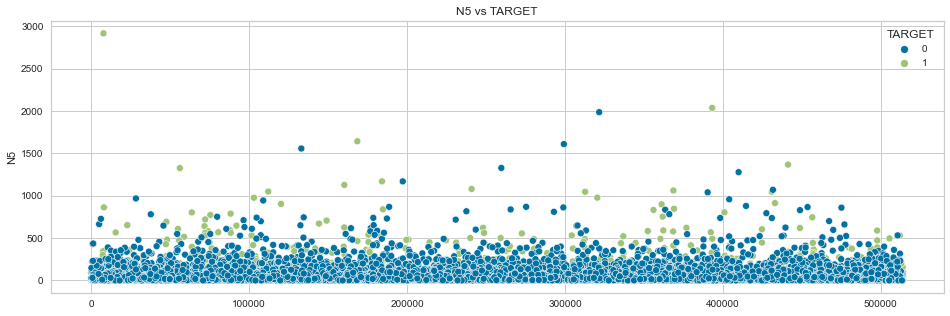

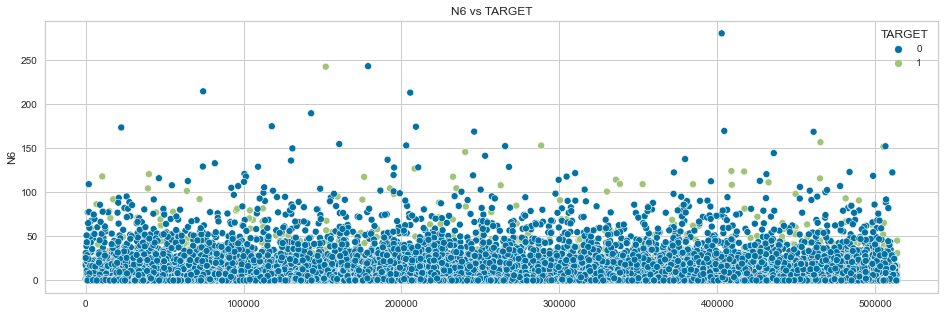

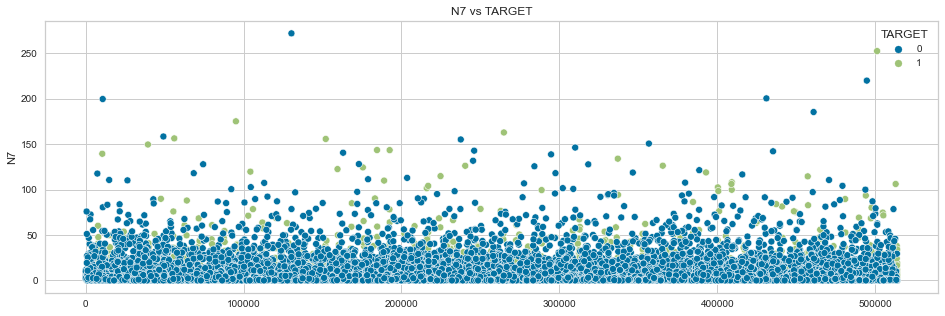

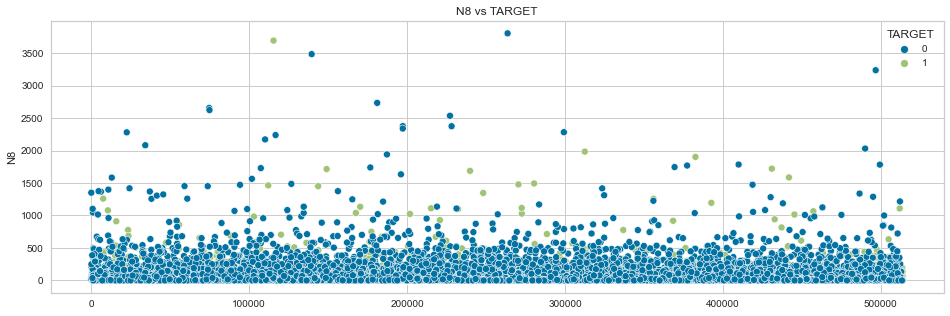

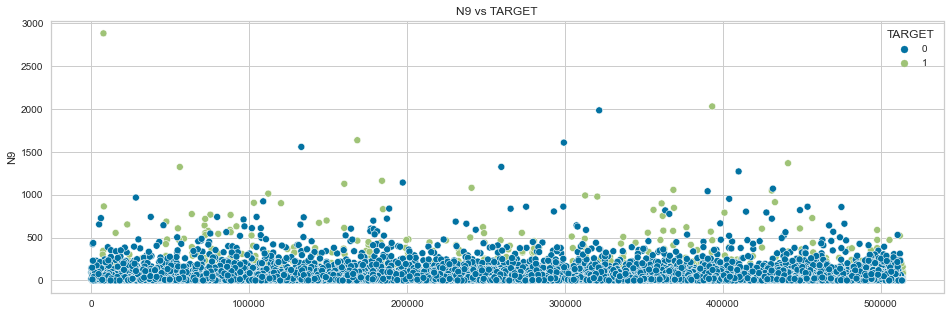

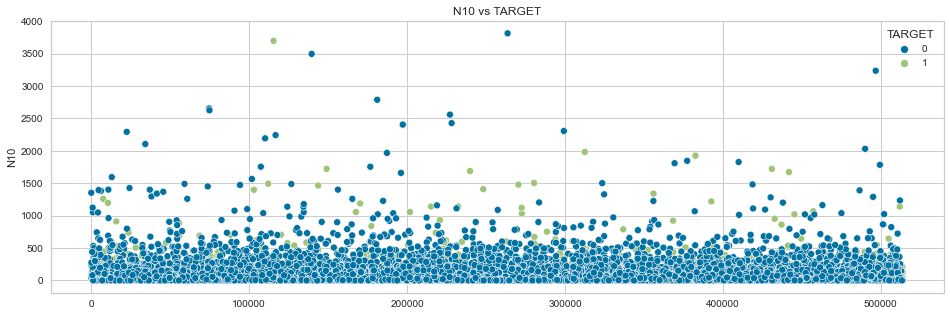

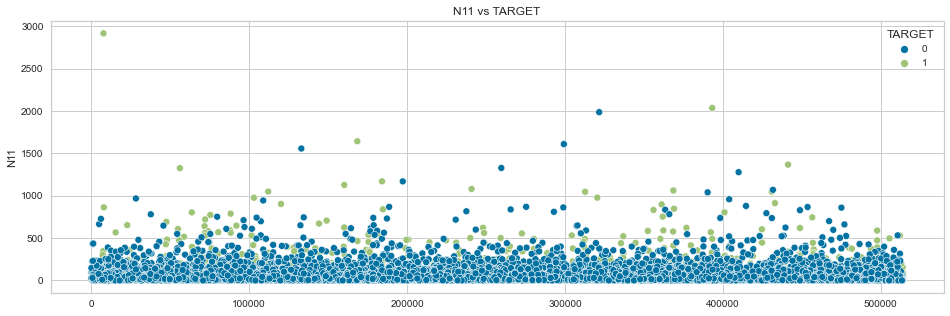

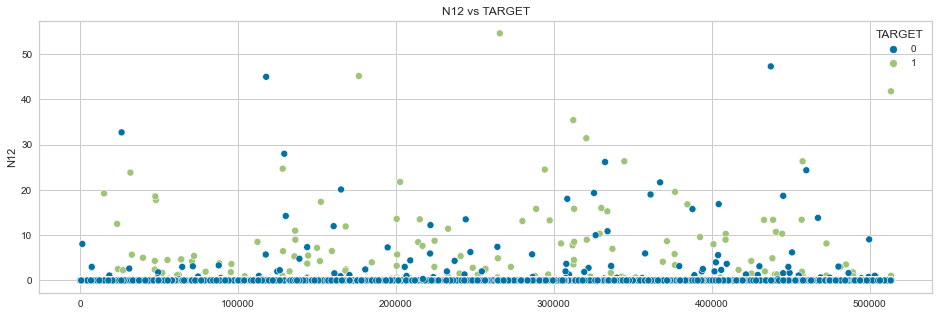

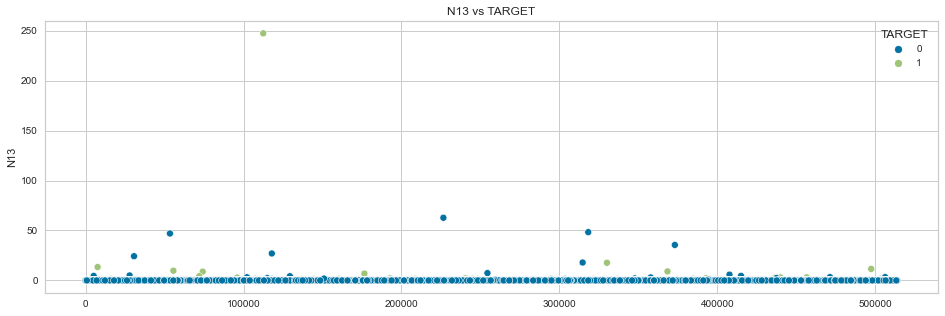

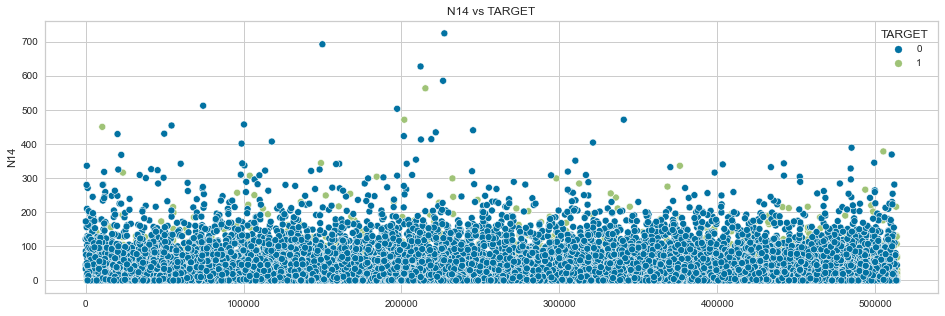

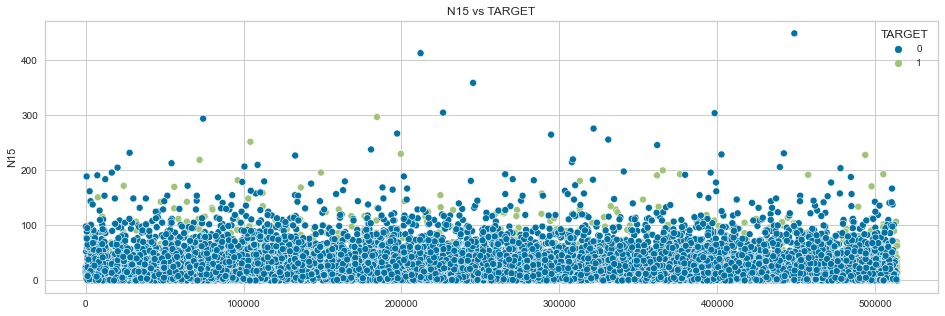

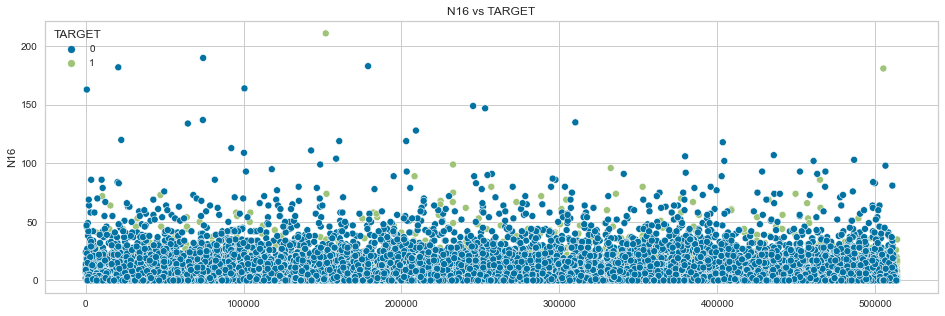

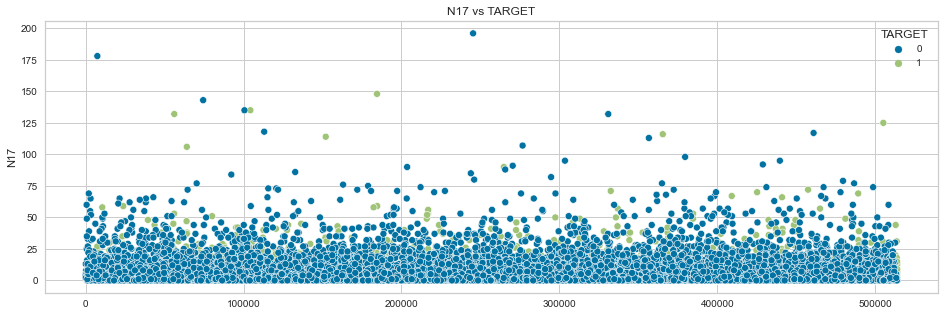

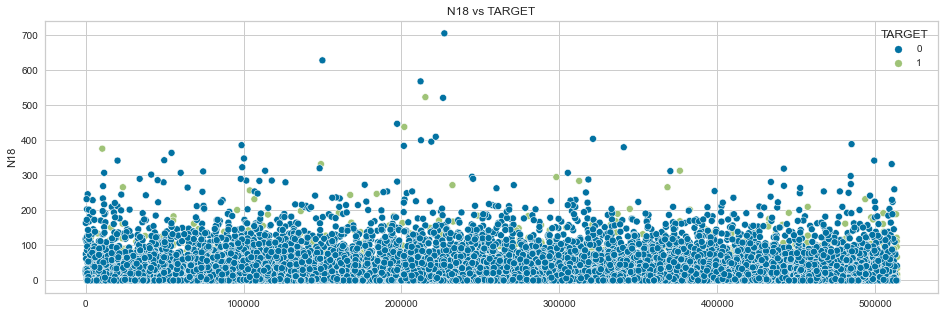

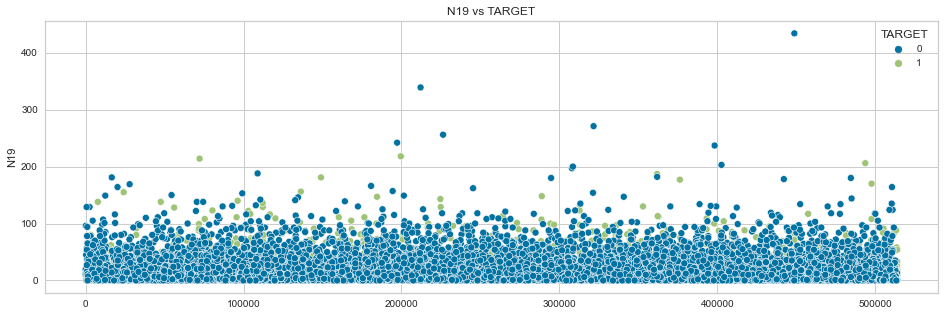

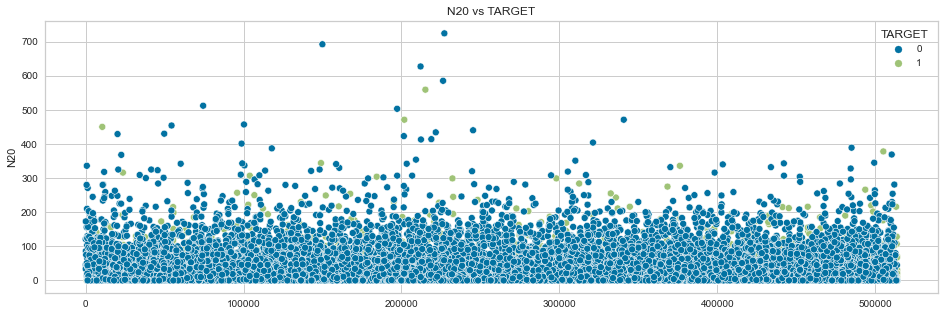

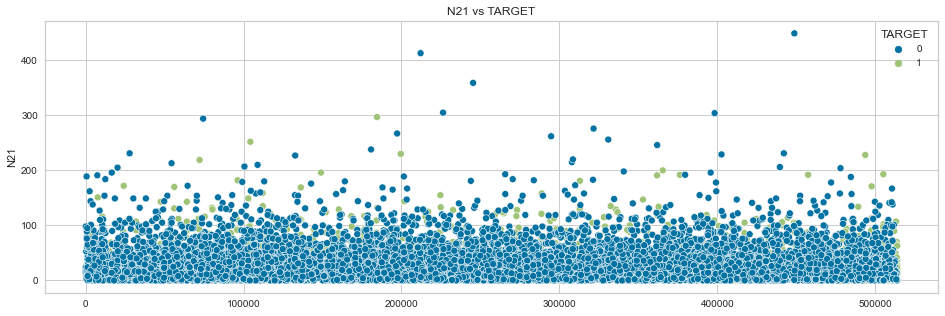

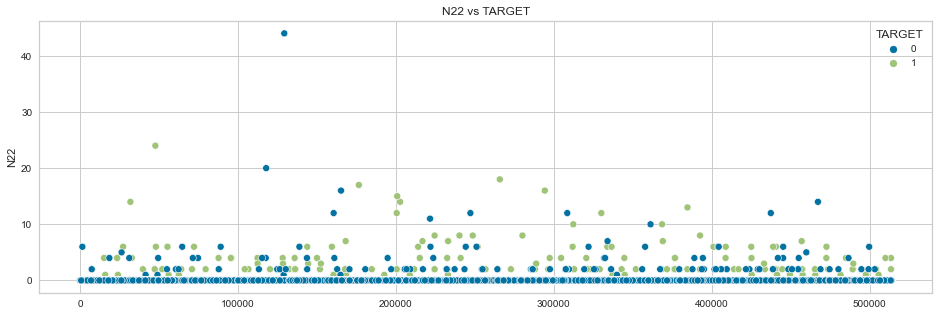

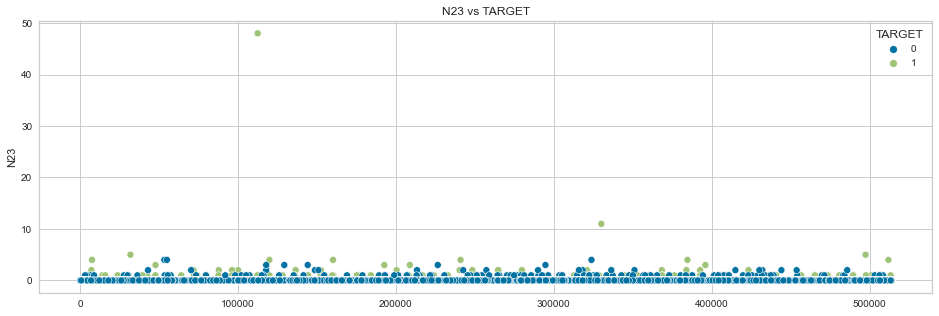

In [117]:
for i in df.columns[3:26]:
    explore_feature(sample, i)
    print('\n')

---

#### Build Model

In [20]:
X = df.drop('TARGET', axis = 1)
y = df.TARGET
print(X.shape)
print(y.shape)

X_ = df.drop(['TARGET','C1'], axis = 1)
print(X_.shape)

(514009, 26)
(514009,)
(514009, 25)


**There will be options:**
1. Instance without change
2. Instance with change: {SMOTE}

#### Instance without change

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2022)

print('x_train:', X_train.shape)
print('y_train:', y_train.shape)

print('x_test:', X_test.shape)
print('y_test:', y_test.shape)


X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y, test_size = 0.20, random_state = 2022)

print('x_train_:', X_train_.shape)
print('x_test_:', X_test_.shape)

x_train: (411207, 26)
y_train: (411207,)
x_test: (102802, 26)
y_test: (102802,)
x_train_: (411207, 25)
x_test_: (102802, 25)


In [22]:
y_train.value_counts()

0    390912
1     20295
Name: TARGET, dtype: int64

#### Instance with change: {SMOTE}

In [23]:
# TODO: сбалансировать с помощью SMOTE

In [24]:
sm = SMOTE(random_state=2022)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print('X_train_res:', X_train_res.shape)
print('y_train_res:', y_train_res.shape)


X_train_res_, y_train_res_ = sm.fit_resample(X_train_, y_train_)

print('X_train_res_:', X_train_res_.shape)
print('y_train_res_:', y_train_res_.shape)

X_train_res: (781824, 26)
y_train_res: (781824,)
X_train_res_: (781824, 25)
y_train_res_: (781824,)


In [25]:
y_train_res.value_counts()

0    390912
1    390912
Name: TARGET, dtype: int64

## Logistic Regression

#### Logistic Regression - Instance without change

* with C1

In [26]:
model_lg_origin = LogisticRegression().fit(X_train, y_train)
y_pred_lg_origin = model_lg_origin.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     97753
           1       0.00      0.00      0.00      5049

    accuracy                           0.95    102802
   macro avg       0.48      0.50      0.49    102802
weighted avg       0.90      0.95      0.93    102802



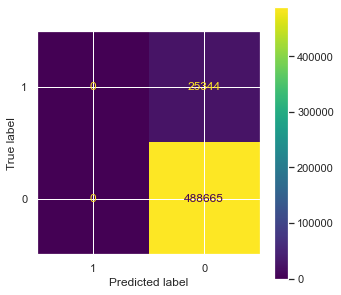

Accuracy score for Logistic Regression is: 0.9507


In [27]:
print(classification_report(y_test, y_pred_lg_origin))

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model_lg_origin, X, y, ax = ax, labels = [1, 0])
plt.show()

print("Accuracy score for Logistic Regression is: {:.4f}".format(accuracy_score(y, model_lg_origin.predict(X))))

* without C1

In [28]:
model_lg_origin_ = LogisticRegression().fit(X_train_, y_train_)
y_pred_lg_origin_ = model_lg_origin_.predict(X_test_)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     97753
           1       0.00      0.00      0.00      5049

    accuracy                           0.95    102802
   macro avg       0.48      0.50      0.49    102802
weighted avg       0.90      0.95      0.93    102802



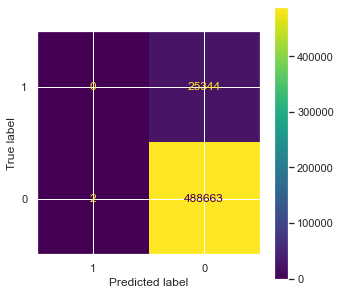

Accuracy score for Logistic Regression is: 0.9507


In [29]:
print(classification_report(y_test_, y_pred_lg_origin_))

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model_lg_origin_, X_, y, ax = ax, labels = [1, 0])
plt.show()

print("Accuracy score for Logistic Regression is: {:.4f}".format(accuracy_score(y, model_lg_origin_.predict(X_))))

#### Logistic Regression - Instance with change

* with C1

In [30]:
model_lg_smote = LogisticRegression().fit(X_train_res, y_train_res)
y_pred_lg_smote = model_lg_smote.predict(X_test)

[[    0 97753]
 [    0  5049]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     97753
           1       0.05      1.00      0.09      5049

    accuracy                           0.05    102802
   macro avg       0.02      0.50      0.05    102802
weighted avg       0.00      0.05      0.00    102802



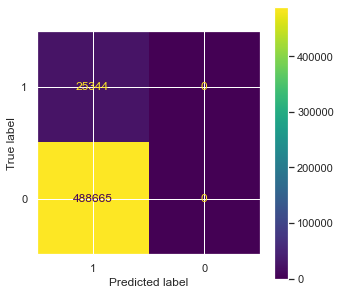

Accuracy score for Logistic Regression is: 0.0493


In [31]:
print(confusion_matrix(y_test, model_lg_smote.predict(X_test)))

print(classification_report(y_test,  model_lg_smote.predict(X_test)))

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model_lg_smote, X, y, ax = ax, labels = [1, 0])
plt.show()

print("Accuracy score for Logistic Regression is: {:.4f}".format(accuracy_score(y, model_lg_smote.predict(X))))

* without C1

In [32]:
model_lg_smote_ = LogisticRegression().fit(X_train_res_, y_train_res_)
y_pred_lg_smote_ = model_lg_smote_.predict(X_test_)

[[63866 33887]
 [  798  4251]]
              precision    recall  f1-score   support

           0       0.99      0.65      0.79     97753
           1       0.11      0.84      0.20      5049

    accuracy                           0.66    102802
   macro avg       0.55      0.75      0.49    102802
weighted avg       0.94      0.66      0.76    102802



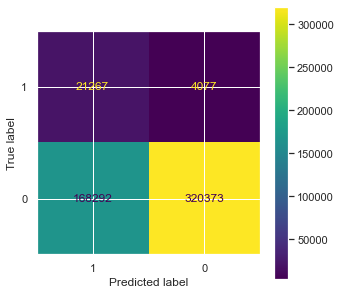

Accuracy score for Logistic Regression is: 0.6647


In [33]:
print(confusion_matrix(y_test_, model_lg_smote_.predict(X_test_)))

print(classification_report(y_test_,  model_lg_smote_.predict(X_test_)))

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model_lg_smote_, X_, y, ax = ax, labels = [1, 0])
plt.show()

print("Accuracy score for Logistic Regression is: {:.4f}".format(accuracy_score(y, model_lg_smote_.predict(X_))))

## DecisionTreeClassifier

#### DecisionTreeClassifier - Instance without change

* with C1

In [37]:
# Parameters to optimize DecisionTree
params = {
    'criterion':['gini', 'entropy'],
    'max_features':[None, 'sqrt'],
    'class_weight':[{1:1,0:0.3}, {1:1,0:0.5}, {1:1, 0:0.7}]
    }
search_dec = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params, n_jobs = -1)

search_dec.fit(X_train_res, y_train_res) # 5 min

# Extract best estimator
best_dec = search_dec.best_estimator_
print(f'Best parameters:{ best_dec }')

Best parameters:DecisionTreeClassifier(class_weight={0: 0.3, 1: 1}, criterion='entropy')


Recall: 0.3545256486432957
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     97753
           1       0.30      0.35      0.33      5049

    accuracy                           0.93    102802
   macro avg       0.63      0.66      0.64    102802
weighted avg       0.93      0.93      0.93    102802



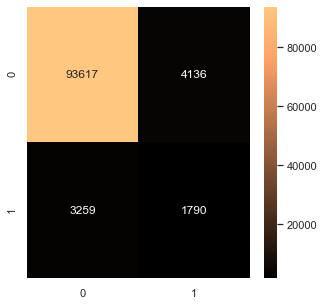

In [38]:
model_dec_origin = DecisionTreeClassifier(class_weight={0: 0.3, 1: 1}, criterion='entropy', max_features='sqrt').fit(X_train, y_train)
y_pred_dec_origin = model_dec_origin.predict(X_test)

print(f"Recall: {recall_score(y_test, y_pred_dec_origin)}")
print(classification_report(y_test, y_pred_dec_origin))

fig, ax = plt.subplots(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test, y_pred_dec_origin)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = plt.cm.copper, ax=ax)
plt.show()

#### DecisionTreeClassifier - Instance with change

* with C1

Recall: 0.40404040404040403
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     97753
           1       0.22      0.40      0.28      5049

    accuracy                           0.90    102802
   macro avg       0.59      0.66      0.61    102802
weighted avg       0.93      0.90      0.91    102802



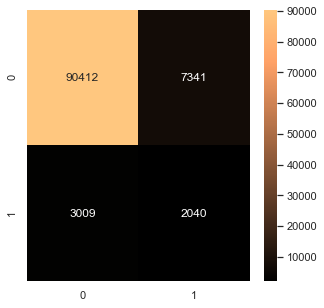

In [39]:
model_dec_smote = DecisionTreeClassifier(class_weight={0: 0.3, 1: 1}, criterion='entropy').fit(X_train_res, y_train_res)
y_pred_dec_smote = model_dec_smote.predict(X_test)

print(f"Recall: {recall_score(y_test, y_pred_dec_smote)}")
print(classification_report(y_test, y_pred_dec_smote))

fig, ax = plt.subplots(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test, y_pred_dec_smote)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = plt.cm.copper, ax=ax)
plt.show()

* without C1

In [40]:
# Parameters to optimize DecisionTree
params = {
    'criterion':['gini', 'entropy'],
    'max_features':[None, 'sqrt'],
    'class_weight':[{1:1,0:0.3}, {1:1,0:0.5}, {1:1, 0:0.7}]
    }
search_dec_ = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params, n_jobs = -1)

search_dec_.fit(X_train_res_, y_train_res_) # 8 min

# Extract best estimator
best_dec_ = search_dec_.best_estimator_
print(f'Best parameters:{ best_dec_ }')

Best parameters:DecisionTreeClassifier(class_weight={0: 0.7, 1: 1}, criterion='entropy')


Recall: 0.5030699148346207
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     97753
           1       0.22      0.50      0.31      5049

    accuracy                           0.89    102802
   macro avg       0.60      0.71      0.62    102802
weighted avg       0.94      0.89      0.91    102802



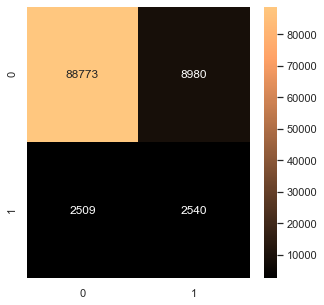

In [41]:
model_dec_smote_ = DecisionTreeClassifier(class_weight={0: 0.7, 1: 1}, criterion='entropy').fit(X_train_res_, y_train_res_)
y_pred_dec_smote_ = model_dec_smote_.predict(X_test_)

print(f"Recall: {recall_score(y_test_, y_pred_dec_smote_)}")
print(classification_report(y_test_, y_pred_dec_smote_))

fig, ax = plt.subplots(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test_, y_pred_dec_smote_)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = plt.cm.copper, ax=ax)
plt.show()

## Support Vector Classifier

#### Support Vector Classifier - Instance without change

* with C1

In [98]:
params = {
    'kernel':['rbf','linear'],
    'C': [0.3,0.5,0.7,1],
    'gamma':['auto','scale'],
    'class_weight':[{1:1,0:0.3},{1:1,0:0.5},{1:1,0:0.7}]
    }
model_svc_ = SVC(
    cache_size=3000,
    max_iter=1000, # Limit processing time
)
search_svc = GridSearchCV(estimator = model_svc_, param_grid = params, n_jobs = -1)

In [99]:
search_svc.fit(X_train_res, y_train_res) # between 1 and 3 hours

GridSearchCV(estimator=SVC(cache_size=3000, max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.3, 0.5, 0.7, 1],
                         'class_weight': [{0: 0.3, 1: 1}, {0: 0.5, 1: 1},
                                          {0: 0.7, 1: 1}],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'linear']})

In [100]:
# Extract best estimator
best_svc_ = search_svc.best_estimator_
print(f'Best parameters:{ best_svc_ }')

Best parameters:SVC(C=0.3, cache_size=3000, class_weight={0: 0.7, 1: 1}, gamma='auto',
    kernel='linear', max_iter=1000)


In [106]:
model_svc_origin = SVC(C=0.3, cache_size=3000, class_weight={0: 0.7, 1: 1}, gamma='auto', kernel='linear', max_iter=1000, probability=True).fit(X_train, y_train)
y_pred_svc_origin = model_svc_origin.predict(X_test)

Recall: 0.12715389185977422
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     97753
           1       0.02      0.13      0.03      5049

    accuracy                           0.61    102802
   macro avg       0.48      0.38      0.39    102802
weighted avg       0.89      0.61      0.72    102802



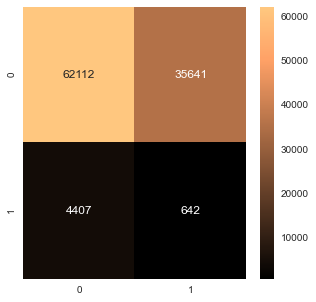

In [107]:
print(f"Recall: {recall_score(y_test, y_pred_svc_origin)}")
print(classification_report(y_test, y_pred_svc_origin))

fig, ax = plt.subplots(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test, y_pred_svc_origin)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = plt.cm.copper, ax=ax)
plt.show()

#### Support Vector Classifier- Instance with change

* with C1

In [104]:
model_svc_smote = SVC(C=0.3, cache_size=3000, class_weight={0: 0.7, 1: 1}, gamma='auto', kernel='linear', max_iter=1000, probability=True).fit(X_train_res, y_train_res)
y_pred_svc_smote = model_svc_smote.predict(X_test)

Recall: 0.9754406813230343
              precision    recall  f1-score   support

           0       0.98      0.07      0.13     97753
           1       0.05      0.98      0.10      5049

    accuracy                           0.12    102802
   macro avg       0.52      0.52      0.12    102802
weighted avg       0.94      0.12      0.13    102802



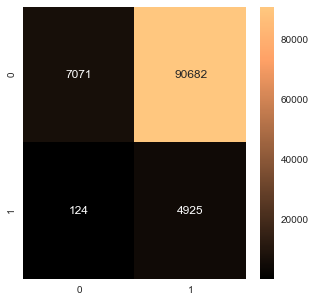

In [105]:
print(f"Recall: {recall_score(y_test, y_pred_svc_smote)}")
print(classification_report(y_test, y_pred_svc_smote))

fig, ax = plt.subplots(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test, y_pred_svc_smote)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = plt.cm.copper, ax=ax)
plt.show()

* without C1

In [108]:
model_svc_smote_ = SVC(C=0.3, cache_size=3000, class_weight={0: 0.7, 1: 1}, gamma='auto', kernel='linear', max_iter=1000, probability=True).fit(X_train_res_, y_train_res_)
y_pred_svc_smote_ = model_svc_smote_.predict(X_test_)

Recall: 0.9766290354525649
              precision    recall  f1-score   support

           0       0.95      0.02      0.04     97753
           1       0.05      0.98      0.09      5049

    accuracy                           0.07    102802
   macro avg       0.50      0.50      0.07    102802
weighted avg       0.91      0.07      0.05    102802



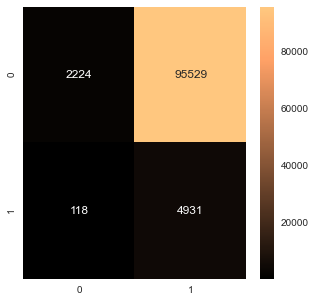

In [109]:
print(f"Recall: {recall_score(y_test_, y_pred_svc_smote_)}")
print(classification_report(y_test, y_pred_svc_smote_))

fig, ax = plt.subplots(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test_, y_pred_svc_smote_)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = plt.cm.copper, ax=ax)
plt.show()

## KNN

#### KNN - Instance without change

* without C1

In [120]:
model_knn_origin_ = KNeighborsClassifier().fit(X_train_, y_train_)
y_pred_knn_origin_ = model_knn_origin_.predict(X_test_)

Recall: 0.20796197266785502
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     97753
           1       0.47      0.21      0.29      5049

    accuracy                           0.95    102802
   macro avg       0.71      0.60      0.63    102802
weighted avg       0.94      0.95      0.94    102802



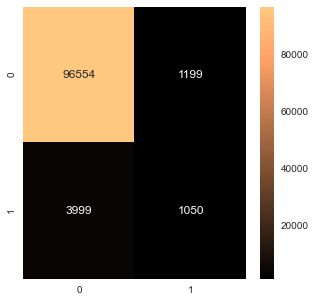

In [126]:
print(f"Recall: {recall_score(y_test_, y_pred_knn_origin_)}")
print(classification_report(y_test_, y_pred_knn_origin_))

fig, ax = plt.subplots(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test_, y_pred_knn_origin_)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = plt.cm.copper, ax=ax)
plt.show()

#### KNN - Instance with change

* with C1

In [127]:
model_knn_smote = KNeighborsClassifier().fit(X_train_res, y_train_res)
y_pred_knn_smote = model_knn_smote.predict(X_test)

Recall: 0.5904139433551199
              precision    recall  f1-score   support

           0       0.97      0.63      0.77     97753
           1       0.08      0.59      0.14      5049

    accuracy                           0.63    102802
   macro avg       0.52      0.61      0.45    102802
weighted avg       0.92      0.63      0.74    102802



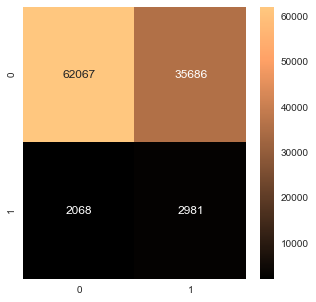

In [128]:
print(f"Recall: {recall_score(y_test, y_pred_knn_smote)}")
print(classification_report(y_test, y_pred_knn_smote))

fig, ax = plt.subplots(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test, y_pred_knn_smote)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = plt.cm.copper, ax=ax)
plt.show()

* without C1

In [129]:
model_knn_smote_ = KNeighborsClassifier().fit(X_train_res_, y_train_res_)
y_pred_knn_smote_ = model_knn_smote_.predict(X_test_)

Recall: 0.6217072687660923
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     97753
           1       0.17      0.62      0.26      5049

    accuracy                           0.83    102802
   macro avg       0.57      0.73      0.58    102802
weighted avg       0.94      0.83      0.87    102802



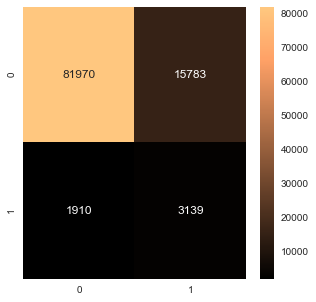

In [130]:
print(f"Recall: {recall_score(y_test_, y_pred_knn_smote_)}")
print(classification_report(y_test_, y_pred_knn_smote_))

fig, ax = plt.subplots(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test_, y_pred_knn_smote_)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = plt.cm.copper, ax=ax)
plt.show()

#### ROC AUC

* with C1

In [131]:
# logistic regression
pred_test_lg = model_lg_smote.predict_proba(X_test)[:, 1]
fpr1, tpr1, threshold1 = roc_curve(y_test, pred_test_lg)

In [132]:
# decision tree
pred_test_dtree = model_dec_smote.predict_proba(X_test)[:, 1]
fpr2, tpr2, threshold2 = roc_curve(y_test, pred_test_dtree)

In [133]:
# svc
pred_test_svc = model_svc_smote.predict_proba(X_test)[:, 1]
fpr3, tpr3, threshold3 = roc_curve(y_test, pred_test_svc)

In [134]:
# knn
pred_test_knn = model_knn_smote.predict_proba(X_test)[:, 1]
fpr4, tpr4, threshold4 = roc_curve(y_test, pred_test_knn)

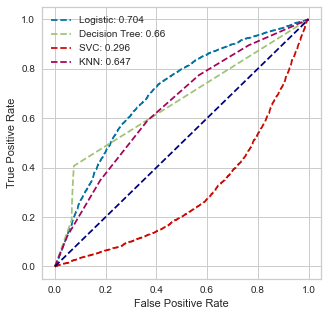

In [135]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(fpr1, tpr1, linestyle='--', label=f'Logistic: {np.round(auc(fpr1, tpr1), 3)}' )
plt.plot(fpr2, tpr2, linestyle='--', label=f'Decision Tree: {np.round(auc(fpr2, tpr2), 3)}')
plt.plot(fpr3, tpr3, linestyle='--', label=f'SVC: {np.round(auc(fpr3, tpr3), 3)}')
plt.plot(fpr4, tpr4, linestyle='--', label=f'KNN: {np.round(auc(fpr4, tpr4), 3)}')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

* without C1

In [136]:
# logistic regression
pred_test_lg_ = model_lg_smote_.predict_proba(X_test_)[:, 1]
fpr1_, tpr1_, threshold1_ = roc_curve(y_test_, pred_test_lg_)

In [137]:
# decision tree
pred_test_dtree_ = model_dec_smote_.predict_proba(X_test_)[:, 1]
fpr2_, tpr2_, threshold2_ = roc_curve(y_test_, pred_test_dtree_)

In [138]:
# svc
pred_test_svc_ = model_svc_smote_.predict_proba(X_test_)[:, 1]
fpr3_, tpr3_, threshold3_ = roc_curve(y_test_, pred_test_svc_)

In [139]:
# knn
pred_test_knn_  = model_knn_smote_.predict_proba(X_test_)[:, 1]
fpr4_, tpr4_, threshold4_ = roc_curve(y_test_, pred_test_knn_)

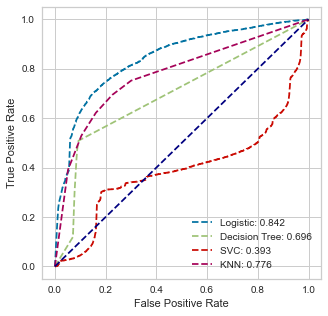

In [140]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(fpr1_, tpr1_, linestyle='--', label=f'Logistic: {np.round(auc(fpr1_, tpr1_), 3)}' )
plt.plot(fpr2_, tpr2_, linestyle='--', label=f'Decision Tree: {np.round(auc(fpr2_, tpr2_), 3)}')
plt.plot(fpr3_, tpr3_, linestyle='--', label=f'SVC: {np.round(auc(fpr3_, tpr3_), 3)}')
plt.plot(fpr4_, tpr4_, linestyle='--', label=f'KNN: {np.round(auc(fpr4_, tpr4_), 3)}')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()